<a href="https://colab.research.google.com/github/SeungJuCha/Ideaton_project/blob/master/EasyOCR_%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,191 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [ ]:
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [ ]:
#이미지 확인용 Function
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 
 
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
  image_list_title = []
  image_list = []
 
  image = imutils.resize(image, width=width)
  ratio = org_image.shape[1] / float(image.shape[1])
 
  # 이미지를 grayscale로 변환하고 blur를 적용
  # 모서리를 찾기위한 이미지 연산
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, ksize, 0)
  edged = cv2.Canny(blurred, min_threshold, max_threshold)
 
  image_list_title = ['gray', 'blurred', 'edged']
  image_list = [gray, blurred, edged]
 
  # contours를 찾아 크기순으로 정렬
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
  findCnt = None
 
  # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영역으로 판단하고 break
    if len(approx) == 4:
      findCnt = approx
      break
 
 
  # 만약 추출한 윤곽이 없을 경우 오류
  if findCnt is None:
    raise Exception(("Could not find outline."))
 
 
  output = image.copy()
  cv2.drawContours(output, [findCnt], -1, (0, 255, 0), 2)
  
  image_list_title.append("Outline")
  image_list.append(output)
 
  # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
  transform_image = four_point_transform(org_image, findCnt.reshape(4, 2) * ratio)
 
  plt_imshow(image_list_title, image_list)
  plt_imshow("Transform", transform_image)
 
  return transform_image

In [ ]:
def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=22):
  # Colab이 아닌 Local에서 수행 시에는 gulim.ttc 를 사용하면 됩니다.
  # font = ImageFont.truetype("fonts/gulim.ttc", font_size)
  font = ImageFont.truetype('/content/drive/MyDrive/H2GTRE.TTF', font_size)

  
  img = Image.fromarray(cv_img)
   
  draw = ImageDraw.Draw(img)
  draw.text((x, y), text, font=font, fill=color)
 
  cv_img = np.array(img)
  
  return cv_img

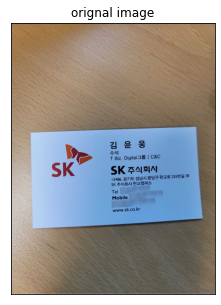

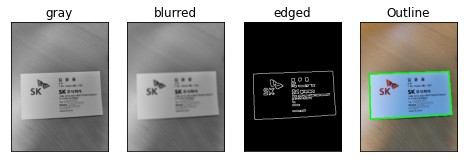

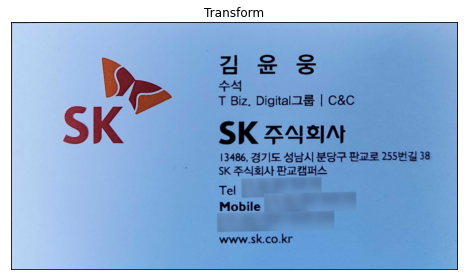

(1254837,)


In [ ]:
url = 'https://user-images.githubusercontent.com/69428232/155486780-55525c3c-8f5f-4313-8590-dd69d4ce4111.jpg'

image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
plt_imshow("orignal image", org_image)
 
business_card_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

print(image_nparray.shape)


In [ ]:
langs = ['ko', 'en']
 
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(business_card_image)

[INFO] OCR'ing input image...


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
print(results)
#결과값은 추출된 글자에 대해 각 4개의 꼭지점 좌표(Top-Left, Top-Right, Bottom-Right, Bottom-Left)와 
#인식한 글자, 확률(Probability)을 리스트 형태로 Return 합니다.
print('-'*80)

simple_results = reader.readtext(business_card_image, detail = 0)
print(simple_results)

[([[710, 102], [1063, 102], [1063, 195], [710, 195]], '김 운 웅', 0.6363428423315667), ([[714, 194], [806, 194], [806, 248], [714, 248]], '수석', 0.9967893616342169), ([[712, 244], [1196, 244], [1196, 300], [712, 300]], 'T Biz. Digital그룹 | C8C', 0.8564255168587909), ([[169, 279], [407, 279], [407, 437], [169, 437]], 'SK', 0.9998691786886823), ([[710, 334], [1168, 334], [1168, 438], [710, 438]], 'SK 주식회사', 0.9243430033461233), ([[714, 440], [1456, 440], [1456, 496], [714, 496]], '13486, 경기도 성남시 분당구 판교로 255번길 38', 0.8064838259317525), ([[712, 488], [1098, 488], [1098, 542], [712, 542]], 'SK 주식회사 판교캠퍼스', 0.9777643971057438), ([[715, 561], [783, 561], [783, 605], [715, 605]], 'Tel', 0.9999751540302894), ([[716, 614], [868, 614], [868, 662], [716, 662]], 'Mobile', 0.999993916622258), ([[719, 731], [981, 731], [981, 773], [719, 773]], 'WWWskcokr', 0.7622637036509508)]
--------------------------------------------------------------------------------
['김 운 웅', '수석', 'T Biz. Digital그룹 | C8C', 'SK', '

In [ ]:
# loop over the results
for (bbox, text, prob) in results:
  print("[INFO] {:.4f}: {}".format(prob, text))
  
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
 
	# 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
  cv2.rectangle(business_card_image, tl, br, (0, 255, 0), 2)
  business_card_image = putText(business_card_image, text, tl[0], tl[1] - 60, (0, 255, 0), 50)
	# cv2.putText(business_card_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.6363: 김 운 웅
[INFO] 0.9968: 수석
[INFO] 0.8564: T Biz. Digital그룹 | C8C
[INFO] 0.9999: SK
[INFO] 0.9243: SK 주식회사
[INFO] 0.8065: 13486, 경기도 성남시 분당구 판교로 255번길 38
[INFO] 0.9778: SK 주식회사 판교캠퍼스
[INFO] 1.0000: Tel
[INFO] 1.0000: Mobile
[INFO] 0.7623: WWWskcokr


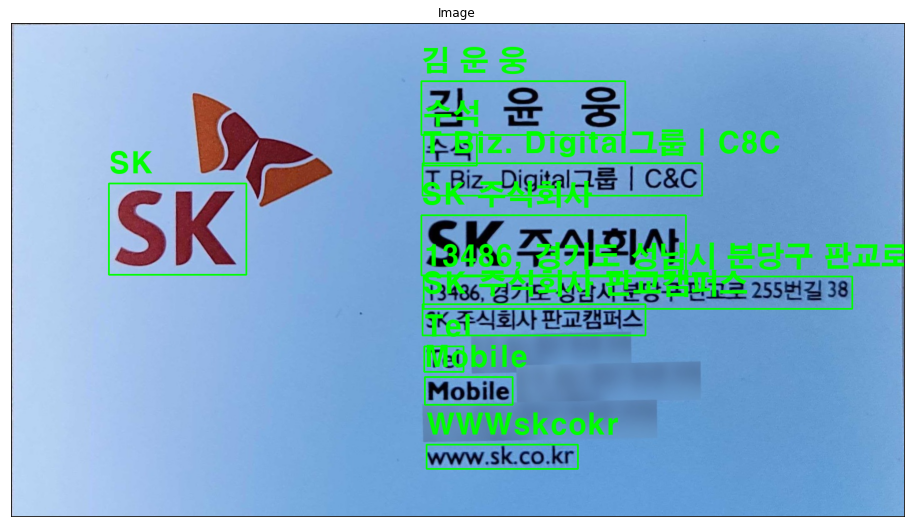

In [ ]:
plt_imshow("Image", business_card_image, figsize=(16,10))

In [ ]:
# path = '/content/drive/MyDrive/text.jpg'
#path = '/content/drive/MyDrive/animal.jpg'
path = '/content/drive/MyDrive/orbit.jpg'
import numpy as np
from PIL import Image

# img = Image.open('/content/drive/MyDrive/text.png')
# img.save('/content/drive/MyDrive/text.jpg')
text_org = Image.open(path)
x = np.array(text_org) # PIL image to NumPy array


#text_image = make_scan_image(text_org, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

In [ ]:
langs = [ 'ko','en']
 
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(text_org)

[INFO] OCR'ing input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
print(results)
simple_results = reader.readtext(text_org, detail = 0)

print(len(simple_results))
print(simple_results)

[([[9, 15], [343, 15], [343, 55], [9, 55]], 'the earth orbits the', 0.9680273493116015), ([[10, 68], [84, 68], [84, 106], [10, 106]], 'sun', 0.9999784576447632)]
2
['the earth orbits the', 'sun']


In [ ]:
#위의 리스트를 받아서 연결을 짓고 이를 기계번역을 통해 영어로 번역후 image생성?

In [ ]:
for (bbox, text, prob) in results:
  print("[INFO] {:.4f}: {}".format(prob, text))
  
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
 
	# 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
  cv2.rectangle(text_org, tl, br, (0, 255, 0), 2)   ###########스캔함수 통해 생성된 이미지
  text_IMAGE = putText(text_org, text, tl[0], tl[1] - 60, (0, 255, 0), 50)
	# cv2.putText(business_card_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2
plt_imshow("Image", text_IMAGE, figsize=(16,10))

[INFO] 0.9933: A little red hen found a


error: ignored

In [ ]:
join_simple_result = ''.join(simple_results)
print(join_simple_result)
print(type(join_simple_result))
text = []
text.append(join_simple_result)

print(text)



the earth orbits thesun
<class 'str'>
['the earth orbits thesun']


In [ ]:
!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 57.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.1-py3-none-any.whl size=53218 sha256=f8056e86153d214f61255cee1456f1488578a8b95d6bf62a87e8b9e56159cd3a
  Stored in directory: /root/.cache/pip/wheels/8c/f9/05/a93eb0defc9eed494ee4d42e3d9076fade98f08982f41cf09f
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646667 sha256=a001d9a39274c53744e9a1a26bff9bfd3992a121db894e485bc89ac892a631af
  Stored in directory: /root/.cache/pip/wheels/a9/98/a3/085a909aa25805f321467a3af3b80d43b6094ed335b4818775
Successfully built kss pecab


In [ ]:
import kss

print('문장 토큰화 :',kss.split_sentences(text))
kss_split = kss.split_sentences(text)
for i in range(len(kss_split)):
  print(kss_split[i])

print(len(kss_split))

문장 토큰화 : ['철저한 준비와 계획?', '그건 그저, 지금 생각일 뿐가능한 더 빨리 시작하고 최대한 더 많이 실패하십시오', '이 책의 저자 존 크름결스와 라이언 바비노는  미국 진로 상담분야의   최고 권위자이다 교수다.', "그들은 미국상담협회로부터 '살아 있는전설'상울 수상햇으며 협회가 수여하는 '명예의 전당' 에 오르며 업적올 인정받앉다.", '-빠르게 실패하기_눈 20년간 진행된 스랜퍼드 대학교의[인생 성장 프로직트]연구에   참여하여  얻은 특별한   결과루 담은  책이다.', '저자들은 연구기간  동안   성공한   사람들에게  나타나는  일런의공통적인 행동 패련올 찾앗고 그 핵심내용올 이 책에 총 9개의 장으로 구성햇다.', "그들이 실험하고 제안한 이 '작은 행동의 힘'은 개인의 삶과사업에 있어 가장 필요한 행동올 근 준비 없이 즉각 실행하게 만듣다.", "그들은 '더 잘 준비되고 더 대단한 목표가 성공에 중요한 요소가아남을 밝혀넷다. 오히려 지금 당장 시작활 수 있는 작은 행동올 통해 더 맘고 잦은 실패에 성공의 열쇠가 있음올 발견하게 된다는 사실올강조한다.흔히 대다수의 사람은 어떤 일흘올 시작하기에 앞서 앞으로 자신이 도달할 거창한 목표록 세운다. 그리고 그 성공에 필요한 실 수 없이 많은요소들올 출력한다. 그 요소들이 있어야 성공에 다가갈 수 있다고 여기논 것이다: 그 요소들올 준비하는데 드는 시간과 비용  노력올 쏟는동안 실제 목표는 아직 시작하지 못하거나 사전 준비 과정에 너무 많은 에너지틀 사용해 사업적 타이망올 놓치거나 인생의 기회틀 놓치는일이 많음올 역설하다하지만  이런 일런이 방식은  실패햇올 때 리스크트 필요 이상으로 키우는   결과루 낭으펴 쉽고 간편하게   경험해   봄으로씨  일이 더 나은방황으로 전환월 수 있는 기회블 날리고 말 뿐이라는 것이다 분명 이 책에서 제안하는 작은 행동은 우리에게 낯선 제안이다: 하지만 이들이밝혀번  바에   따르면   성공하는   사람들과  그렇지  안는 사람들   사이에는  분명한  

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install textblob
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=9dbe76d02402dffbcfcbc3e2796201b8ccfa351860677f86bb37ca81f31c1ae4
  Stored in directory: /root/.cache/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [ ]:
from textblob import TextBlob
spell_check = TextBlob(join_simple_result)

print(spell_check)
print(type(spell_check))

from autocorrect import Speller
spell = Speller(lang='en')

autocorrect_spell =spell(join_simple_result)
print(autocorrect_spell)
print(type(autocorrect_spell))



the earth orbits thesun
<class 'textblob.blob.TextBlob'>
the earth orbits thesun
<class 'str'>


In [ ]:
from nltk.tokenize import sent_tokenize


print('문장 토큰화 :',sent_tokenize(autocorrect_spell))
eng_split = sent_tokenize(autocorrect_spell)
for i in range(len(eng_split)):
  print(eng_split[i])

print(len(eng_split))

문장 토큰화 : ['the earth orbits thesun']
the earth orbits thesun
1


In [ ]:
pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-dewvvgo4
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-dewvvgo4
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=878cceb930565641853def9d110f5669a7681b552d7b704f687dd91ec67abdd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ufkox4x/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker
handspell= []
for i in range(len(eng_split)):
  spelled_sent = spell_checker.check(eng_split[i])
  hanspell_sent = spelled_sent.checked
  handspell.append(hanspell_sent)
print(handspell)
print(len(handspell))

['the earth orbits thesun']
1


In [ ]:
# !nvidia-smi

Sun Feb  5 10:58:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |   2198MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !pip install diffusers==0.3.0
# !pip install transformers scipy ftfy
# !pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.0 MB/s eta 0:00:00


In [ ]:
# from google.colab import output
# output.enable_custom_widget_manager()

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# import torch
# from diffusers import StableDiffusionPipeline

# pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
# pipe = pipe.to('cuda')

NameError: ignored

In [ ]:
# from torch import autocast
# promt = '개가 하늘을 날다'
# with autocast('cuda'):
#   image = pipe(promt).images[0]

# print(image)

In [ ]:
#!pip uninstall diffusers
!pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

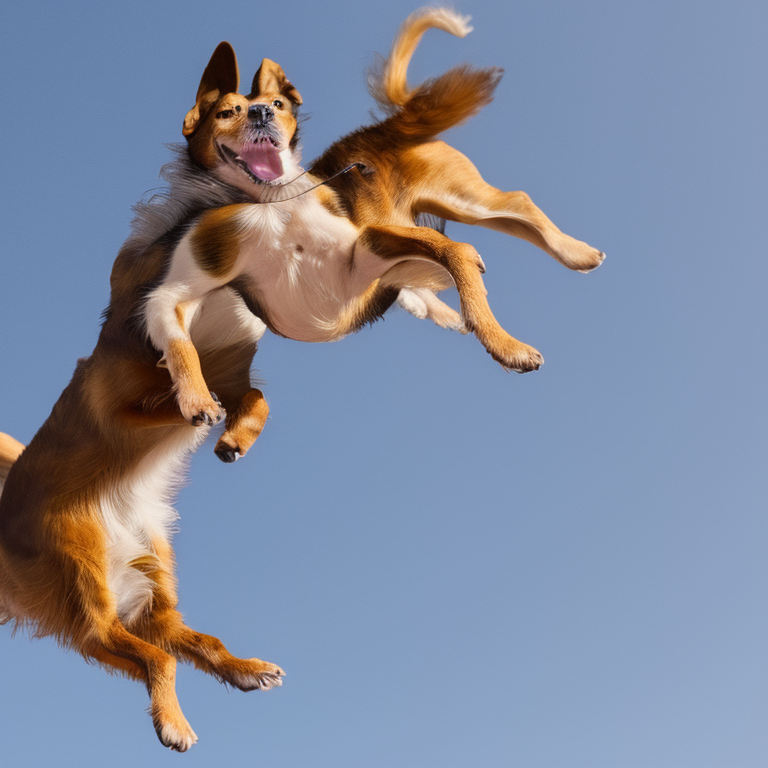

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "Dogs are flying over the sky"
image = pipe(prompt, height=768, width=768).images[0]
    
image.save("astronaut_rides_horse.png")

image

In [ ]:
prompt = "To be or not to be, that is a question"
image = pipe(prompt, height=768, width=768).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

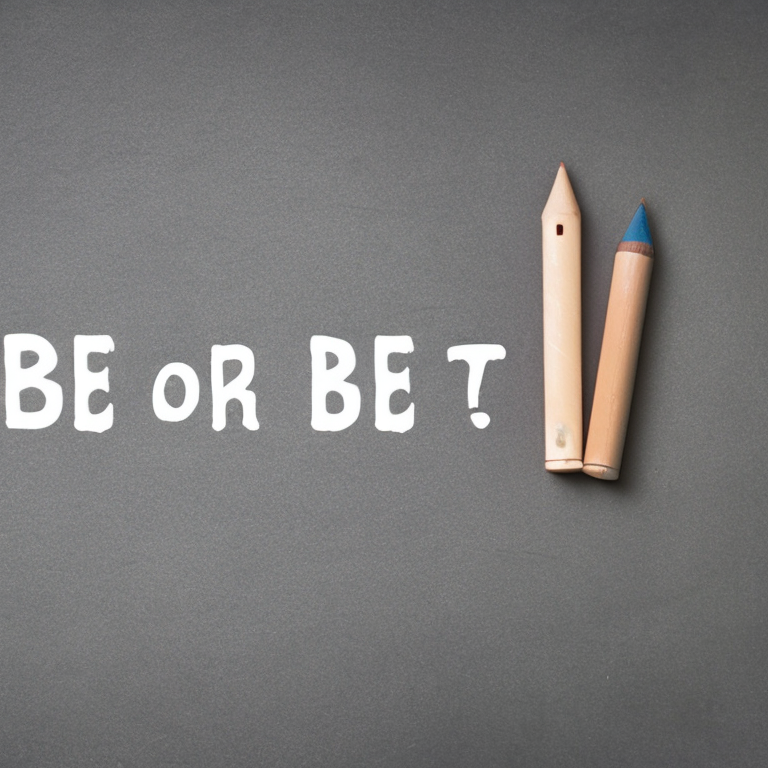

In [ ]:
image

In [ ]:
!pip install symspellpy-ko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/19.1 MB 317.6 kB/s eta 0:00:44
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.8/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.8/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.8/ssl.py", line 1241, in recv_into
    return self.rea

In [ ]:
from symspellpy_ko import KoSymSpell, Verbosity

sym_spell = KoSymSpell()
sym_spell.load_korean_dictionary(decompose_korean=True, load_bigrams=True)
#어절과 유사한 어절들을 찾기

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 KB 7.0 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-translate
    Found existing installation: google-cloud-translate 3.8.4
    Uninstalling google-cloud-translate-3.8.4:
      Successfully uninstalled google-cloud-translate-3.8.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=e8d54eed64c512824fa400ee3e8246838da883129be196489df97a6c0bab28c4
  Stored in directory: /root/.cache/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
   

AttributeError: ignored